In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상명풍력 데이터 읽기
df = pd.read_csv('한국중부발전(주)_풍력 발전 실적(상명풍력).csv', encoding='cp949')

print("컬럼명:", df.columns.tolist())
print("데이터 형태:", df.shape)
print("첫 5행:")
print(df.head())

컬럼명: ['기준일', '호기', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시']
데이터 형태: (762, 26)
첫 5행:
          기준일  호기       1시       2시       3시       4시        5시        6시  \
0  2023-01-01   1  2285684  1240105   632211  2966526   4060737   5057684   
1  2023-01-02   1  5057684  4595684  5276526  4936105   5398105   7902632   
2  2023-01-03   1  5106316  4936105  6249158  8996842  10455789  12717158   
3  2023-01-04   1  5933053  6419368  3501474  6395053   5714211   6078947   
4  2023-01-05   1   194526    97263    97263   437684    996947   1386000   

         7시       8시  ...      15시       16시       17시       18시       19시  \
0   7197474  8048526  ...  3647368   5252211   6249158   6322105   8753684   
1   9385895  8632105  ...  9312947  10042421  10796211  10650316  13349368   
2  11598632  9774947  ...  6784105   8802316   6395053   6905684   8364632   
3   7367684  6638211  .

상명풍력 전체 평균 발전효율: 17.11%


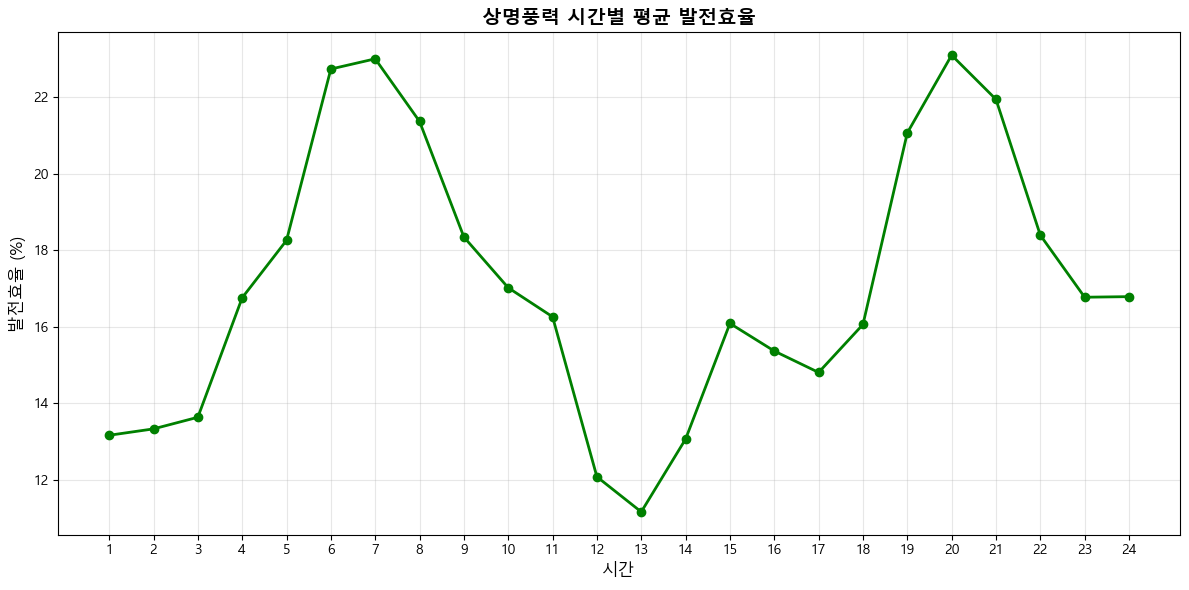

In [22]:
# 설비용량 (kW)
capacity = 21000000  # 21MW = 21,000kW

# 시간별 컬럼들 (1시~24시)
time_columns = [f'{i}시' for i in range(1, 25)]

# 시간별 발전량 데이터만 추출
generation_data = df[time_columns].copy()

# 전체 평균 발전효율 출력
total_avg_generation = generation_data.values.mean()
efficiency = (total_avg_generation / capacity) * 100
print(f"상명풍력 전체 평균 발전효율: {efficiency:.2f}%")

# 시간별 평균 발전량 계산
hourly_avg = generation_data.mean(axis=0)

# 시간별 발전효율 계산
hourly_efficiency = (hourly_avg / capacity) * 100

# 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))
hours = range(1, 25)
plt.plot(hours, hourly_efficiency.values, marker='o', linewidth=2, markersize=6, color='green')
plt.title('상명풍력 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))

plt.tight_layout()
plt.show()

In [10]:
# merged_wind_weather_data.csv 발전효율 계산
import pandas as pd

# 데이터 읽기
merged_df = pd.read_csv('merged_wind_weather_data.csv')

# 발전효율 계산 (발전량 / 설비용량 * 100)
merged_df['발전효율(%)'] = (merged_df['발전량(kWh)'] / (merged_df['설비용량(MW)'] * 1000)) * 100

# 발전구분별 평균 발전효율
for plant in merged_df['발전구분'].unique():
    plant_data = merged_df[merged_df['발전구분'] == plant]
    avg_eff = plant_data['발전효율(%)'].mean()
    capacity = plant_data['설비용량(MW)'].iloc[0]
    
    print(f"{plant}: {avg_eff:.2f}% (설비용량: {capacity}MW)")

군위 화산풍력: 17.24% (설비용량: 1.65MW)
어음풍력: 26.17% (설비용량: 4.2MW)


컬럼명: ['날짜', '발전기명', '설비용량(MW)', '시간', '해당 시간 발전량(kWh)', '해당날짜 총 발전량(kMh)', '주소지']
발전기명 종류: ['장흥풍력' '화순풍력발전']

=== 발전기명별 평균 발전효율 ===
장흥풍력: 11.61% (설비용량: 18.0MW)
화순풍력발전: 16.08% (설비용량: 16.0MW)


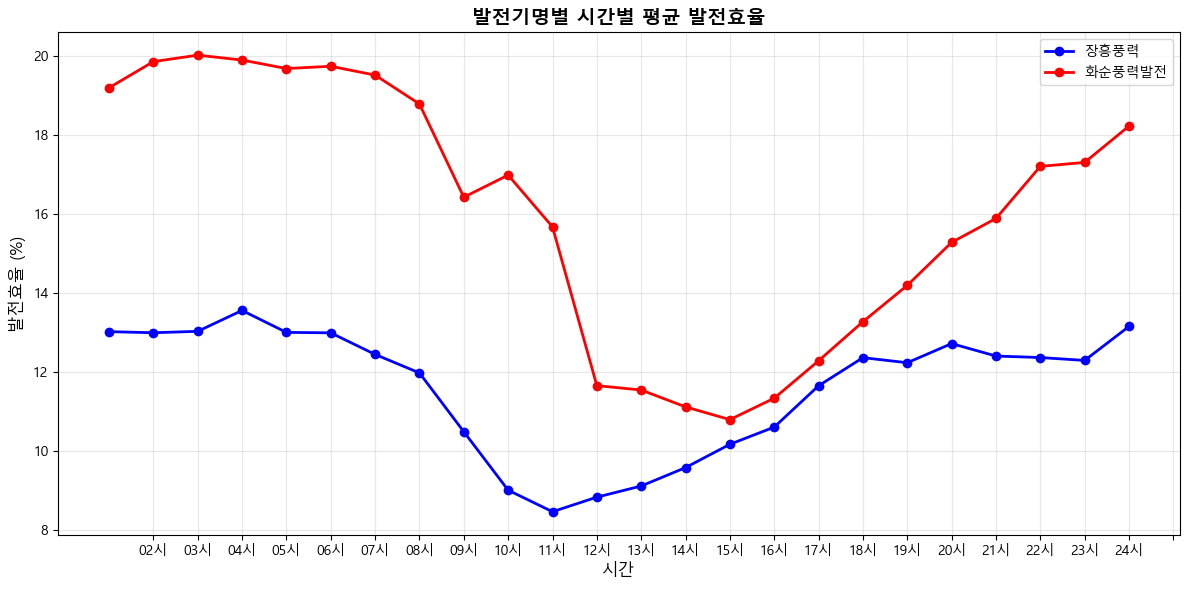

In [19]:
# 한국서부발전 풍력데이터 발전효율 계산
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
west_df = pd.read_csv('한국서부발전_시간별발전량_풍력.csv')

print("컬럼명:", west_df.columns.tolist())
print("발전기명 종류:", west_df['발전기명'].unique())

# 발전효율 계산 (해당 시간 발전량 / 설비용량 * 100)
west_df['발전효율(%)'] = (west_df['해당 시간 발전량(kWh)'] / (west_df['설비용량(MW)'] * 1000)) * 100

# 발전기명별 평균 발전효율
print("\n=== 발전기명별 평균 발전효율 ===")
for plant in west_df['발전기명'].unique():
    plant_data = west_df[west_df['발전기명'] == plant]
    avg_eff = plant_data['발전효율(%)'].mean()
    capacity = plant_data['설비용량(MW)'].iloc[0]
    
    print(f"{plant}: {avg_eff:.2f}% (설비용량: {capacity}MW)")

# 발전기명별 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']  # 발전기별 색상
for i, plant in enumerate(west_df['발전기명'].unique()):
    plant_data = west_df[west_df['발전기명'] == plant]
    hourly_eff = plant_data.groupby('시간')['발전효율(%)'].mean().sort_index()
    
    plt.plot(hourly_eff.index, hourly_eff.values, 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i % len(colors)], label=plant)

plt.title('발전기명별 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))
plt.legend()

plt.tight_layout()
plt.show()

컬럼명: ['년월일', '단계', '총량', '평균', '최대', '최소', '최대(시간별)', '최소(시간별)', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
데이터 형태: (8885, 32)
단계별 데이터 개수:
단계
1    4443
2    4442
Name: count, dtype: int64

=== 단계별 평균 발전효율 ===
1단계: nan% (설비용량: 6MW)
2단계: nan% (설비용량: 15MW)


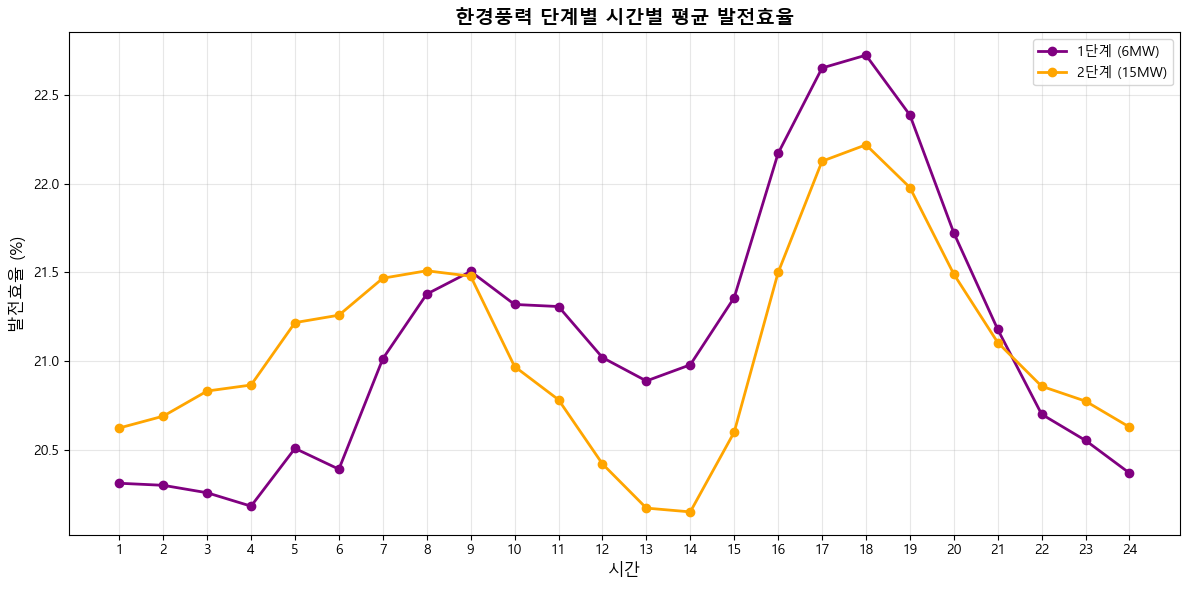

In [23]:
# 한국남부발전 한경풍력 발전효율 계산
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기 (인코딩 문제로 cp949 사용)
hangyeong_df = pd.read_csv('한국남부발전(주)_한경풍력발전실적_20250228.csv', encoding='cp949')

print("컬럼명:", hangyeong_df.columns.tolist())
print("데이터 형태:", hangyeong_df.shape)
print("단계별 데이터 개수:")
print(hangyeong_df['단계'].value_counts())

# 설비용량 설정 (단계별)
# 1단계: 6MW, 2단계: 15MW
def get_capacity(stage):
    if stage == 1:
        return 6000  # 6MW = 6000kW
    elif stage == 2:
        return 15000  # 15MW = 15000kW
    else:
        return 6000  # 기본값

# 단계별 설비용량 적용
hangyeong_df['설비용량(kW)'] = hangyeong_df['단계'].apply(get_capacity)

# 시간별 컬럼들 (1~24)
time_columns = [str(i) for i in range(1, 25)]

print("\n=== 단계별 평균 발전효율 ===")
for stage in sorted(hangyeong_df['단계'].unique()):
    stage_data = hangyeong_df[hangyeong_df['단계'] == stage]
    capacity = get_capacity(stage)
    
    # 해당 단계의 평균 발전량
    stage_avg_generation = stage_data[time_columns].values.mean()
    efficiency = (stage_avg_generation / capacity) * 100
    
    print(f"{stage}단계: {efficiency:.2f}% (설비용량: {capacity/1000:.0f}MW)")

# 단계별 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))

colors = ['purple', 'orange']  # 1단계, 2단계 색상
for i, stage in enumerate(sorted(hangyeong_df['단계'].unique())):
    stage_data = hangyeong_df[hangyeong_df['단계'] == stage]
    capacity = get_capacity(stage)
    
    # 시간별 평균 발전량 계산
    hourly_avg = stage_data[time_columns].mean(axis=0)
    
    # 시간별 발전효율 계산
    hourly_efficiency = (hourly_avg / capacity) * 100
    
    plt.plot(range(1, 25), hourly_efficiency.values, 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i], label=f'{stage}단계 ({capacity/1000:.0f}MW)')

plt.title('한경풍력 단계별 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))
plt.legend()

plt.tight_layout()
plt.show()

컬럼명: ['년월일', '단계', '총량', '평균', '최대', '최소', '최대(시간별)', '최소(시간별)', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']
데이터 형태: (8884, 32)
단계별 데이터 개수:
단계
1    4442
2    4442
Name: count, dtype: int64

=== 성산풍력 단계별 평균 발전효율 ===
1단계: 23.33% (설비용량: 12MW)
2단계: 25.42% (설비용량: 8MW)


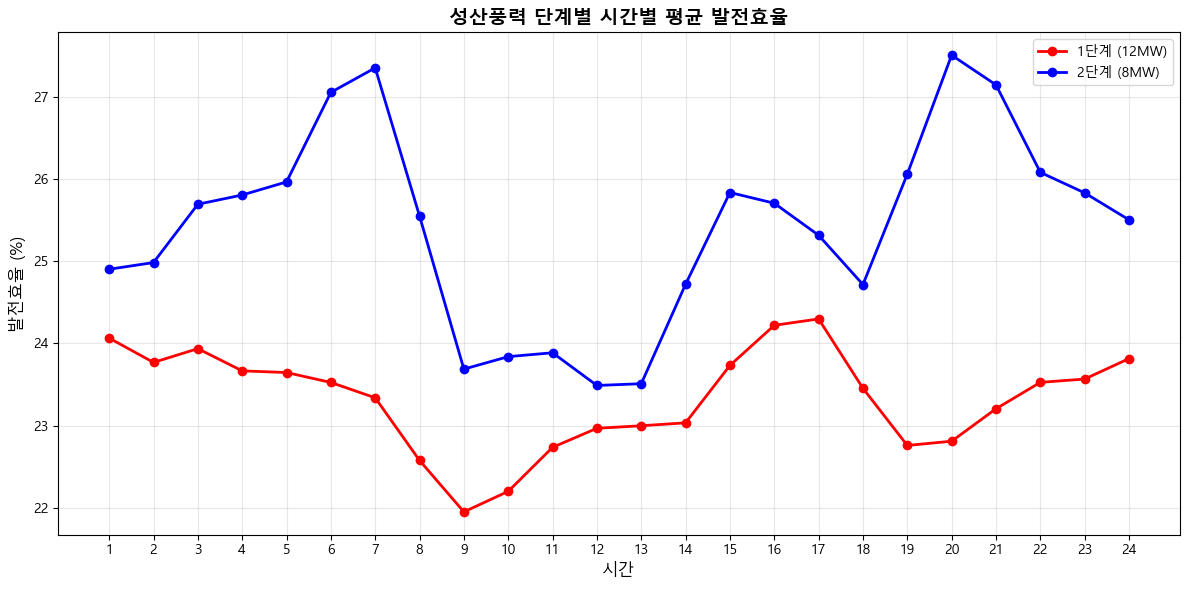

In [26]:
# 한국남부발전 성산풍력 발전효율 계산
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기 (인코딩 문제로 cp949 사용)
seongsan_df = pd.read_csv('한국남부발전(주)_성산풍력발전실적_20250228.csv', encoding='cp949')

print("컬럼명:", seongsan_df.columns.tolist())
print("데이터 형태:", seongsan_df.shape)
print("단계별 데이터 개수:")
print(seongsan_df['단계'].value_counts())

# 설비용량 설정 (단계별)
# 1단계: 12MW, 2단계: 8MW
def get_seongsan_capacity(stage):
    if stage == 1:
        return 12000  # 12MW = 12000kW
    elif stage == 2:
        return 8000   # 8MW = 8000kW
    else:
        return 12000  # 기본값

# 단계별 설비용량 적용
seongsan_df['설비용량(kW)'] = seongsan_df['단계'].apply(get_seongsan_capacity)

# 시간별 컬럼들 (1~24)
time_columns = [str(i) for i in range(1, 25)]

# 시간별 데이터를 숫자로 변환 (문자열이나 오류 데이터는 0으로 처리)
for col in time_columns:
    seongsan_df[col] = pd.to_numeric(seongsan_df[col], errors='coerce').fillna(0)

print("\n=== 성산풍력 단계별 평균 발전효율 ===")
for stage in sorted(seongsan_df['단계'].unique()):
    stage_data = seongsan_df[seongsan_df['단계'] == stage]
    capacity = get_seongsan_capacity(stage)
    
    # 해당 단계의 평균 발전량
    stage_avg_generation = stage_data[time_columns].values.mean()
    efficiency = (stage_avg_generation / capacity) * 100
    
    print(f"{stage}단계: {efficiency:.2f}% (설비용량: {capacity/1000:.0f}MW)")

# 단계별 시간별 발전효율 시각화
plt.figure(figsize=(12, 6))

colors = ['red', 'blue']  # 1단계, 2단계 색상
for i, stage in enumerate(sorted(seongsan_df['단계'].unique())):
    stage_data = seongsan_df[seongsan_df['단계'] == stage]
    capacity = get_seongsan_capacity(stage)
    
    # 시간별 평균 발전량 계산
    hourly_avg = stage_data[time_columns].mean(axis=0)
    
    # 시간별 발전효율 계산
    hourly_efficiency = (hourly_avg / capacity) * 100
    
    plt.plot(range(1, 25), hourly_efficiency.values, 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i], label=f'{stage}단계 ({capacity/1000:.0f}MW)')

plt.title('성산풍력 단계별 시간별 평균 발전효율', fontsize=14, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# 모든 풍력 발전 데이터 통합
import pandas as pd
import numpy as np
from datetime import datetime

# 발전소별 설치일자 정의
install_dates = {
    '상명풍력': '2013-05-01',
    '한경풍력_1단계': '2000-07-01',
    '한경풍력_2단계': '2005-12-01',
    '성산풍력_1단계': '2000-10-01',
    '성산풍력_2단계': '2003-04-01',
    '화순풍력': '2015-11-01'
}

# 발전소별 호기 수 정의 (총 설비용량 및 발전량을 이 수로 나눔)
unit_counts = {
    '상명풍력': 7,
    '한경풍력_1단계': 4,
    '한경풍력_2단계': 5,
    '성산풍력_1단계': 6,  # 1단계: 6개 × 2MW
    '성산풍력_2단계': 4,  # 2단계: 4개 × 2MW
    '화순풍력': 8
}

# 연식 계산 함수 (일자가 설치일자보다 이른 경우 0으로 처리)
def calculate_age(date_str, install_date_str):
    try:
        date = pd.to_datetime(date_str)
        install_date = pd.to_datetime(install_date_str)
        
        age = (date - install_date).days / 365.25
        return max(0, age) if age >= 0 else 0
    except Exception as e:
        # 디버깅을 위한 오류 정보 출력 (화순풍력만)
        if '화순' in str(date_str) or isinstance(date_str, str):
            print(f"   연식 계산 오류 - 일자: {date_str}, 설치일자: {install_date_str}, 오류: {e}")
        return np.nan

print("=== 풍력 발전소 데이터 통합 시작 (호기당 계산) ===")
all_data = []

# 1. 기존 통합 데이터 (군위 화산풍력, 어음풍력) - 그대로 유지
print("1. 기존 통합 데이터 (군위 화산풍력, 어음풍력) 처리 중...")
try:
    merged_df = pd.read_csv('merged_wind_weather_data.csv')
    
    for idx, row in merged_df.iterrows():
        generation = pd.to_numeric(row['발전량(kWh)'], errors='coerce')
        if pd.isna(generation):
            generation = 0
            
        capacity = pd.to_numeric(row['설비용량(MW)'], errors='coerce')
        if pd.isna(capacity):
            capacity = 1.65  # 기본값
            
        age = pd.to_numeric(row['연식(년)'], errors='coerce')
        if pd.isna(age):
            age = np.nan
            
        all_data.append({
            '발전구분': row['발전구분'],
            '호기': row['호기'],
            '일자': row['일자'],
            '시간': row['시간'],
            '발전량(kWh)': generation,
            '설비용량(MW)': capacity,
            '연식(년)': age
        })
    print(f"   기존 통합 데이터: {len([d for d in all_data if d['발전구분'] in ['군위 화산풍력', '어음풍력']])}건 추가")
except Exception as e:
    print(f"   기존 통합 데이터 처리 오류: {e}")

# 2. 상명풍력 (한국중부발전) - 7호기로 나누기, Wh→kWh 변환
print("2. 상명풍력 데이터 처리 중...")
try:
    sangmyeong_df = pd.read_csv('한국중부발전(주)_풍력 발전 실적(상명풍력).csv', encoding='cp949')
    unit_count = unit_counts['상명풍력']
    
    for idx, row in sangmyeong_df.iterrows():
        date = row['기준일']
        age = calculate_age(date, install_dates['상명풍력'])
        
        for hour in range(1, 25):
            hour_col = f'{hour}시'
            if hour_col in sangmyeong_df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce')
                if pd.isna(generation):
                    generation = 0
                
                # Wh → kWh 변환 (1/1000) 후 호기 수로 나누기
                generation_kwh = generation / 1000  # Wh → kWh 변환
                generation_per_unit = generation_kwh / unit_count
                capacity_per_unit = 21 / unit_count
                
                all_data.append({
                    '발전구분': '상명풍력',
                    '호기': 1,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   상명풍력: {len([d for d in all_data if d['발전구분'] == '상명풍력'])}건 추가 (호기당 계산, Wh→kWh 변환)")
except Exception as e:
    print(f"   상명풍력 처리 오류: {e}")

# 3. 한경풍력 (한국남부발전) - 1단계 4호기, 2단계 5호기로 나누기, 단위 확인 후 변환
print("3. 한경풍력 데이터 처리 중...")
try:
    hangyeong_df = pd.read_csv('한국남부발전(주)_한경풍력발전실적_20250228.csv', encoding='cp949')
    
    for idx, row in hangyeong_df.iterrows():
        date = row['년월일']
        stage = row['단계']
        
        # 단계별 호기 수와 설비용량
        if stage == 1:
            unit_count = unit_counts['한경풍력_1단계']
            total_capacity = 6
        else:
            unit_count = unit_counts['한경풍력_2단계']
            total_capacity = 15
        
        capacity_per_unit = total_capacity / unit_count
        
        # 단계별 연식 계산
        install_key = f'한경풍력_{stage}단계'
        age = calculate_age(date, install_dates[install_key])
        
        for hour in range(1, 25):
            hour_col = str(hour)
            if hour_col in hangyeong_df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce')
                if pd.isna(generation):
                    generation = 0
                
                # 단위 확인: 발전량이 작으면 이미 kWh, 크면 Wh일 가능성
                # 한경풍력 분석 결과 평균 1,200 정도면 kWh로 추정됨
                if generation > 100000:  # 임계값 기준으로 Wh로 판단
                    generation_kwh = generation / 1000  # Wh → kWh 변환
                else:
                    generation_kwh = generation  # 이미 kWh
                
                # 발전량을 호기 수로 나누기
                generation_per_unit = generation_kwh / unit_count
                
                all_data.append({
                    '발전구분': '한경풍력',
                    '호기': stage,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   한경풍력: {len([d for d in all_data if d['발전구분'] == '한경풍력'])}건 추가 (호기당 계산, 단위 확인)")
except Exception as e:
    print(f"   한경풍력 처리 오류: {e}")

# 4. 성산풍력 (한국남부발전) - 1단계 6호기, 2단계 4호기로 나누기, 단위 확인 후 변환
print("4. 성산풍력 데이터 처리 중...")
try:
    seongsan_df = pd.read_csv('한국남부발전(주)_성산풍력발전실적_20250228.csv', encoding='cp949')
    
    # 시간별 데이터를 숫자로 변환
    time_columns = [str(i) for i in range(1, 25)]
    for col in time_columns:
        seongsan_df[col] = pd.to_numeric(seongsan_df[col], errors='coerce').fillna(0)
    
    for idx, row in seongsan_df.iterrows():
        date = row['년월일']
        stage = row['단계']
        
        # 단계별 호기 수와 설비용량 (각 호기는 2MW)
        if stage == 1:
            unit_count = unit_counts['성산풍력_1단계']  # 6개
            capacity_per_unit = 2  # 각 호기 2MW
            install_key = '성산풍력_1단계'
        else:
            unit_count = unit_counts['성산풍력_2단계']  # 4개
            capacity_per_unit = 2  # 각 호기 2MW
            install_key = '성산풍력_2단계'
        
        age = calculate_age(date, install_dates[install_key])
        
        for hour in range(1, 25):
            hour_col = str(hour)
            if hour_col in seongsan_df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce')
                if pd.isna(generation):
                    generation = 0
                
                # 단위 확인: 발전량이 크면 Wh일 가능성 (성산풍력 평균 약 1,500 정도)
                if generation > 50000:  # 임계값 기준으로 Wh로 판단
                    generation_kwh = generation / 1000  # Wh → kWh 변환
                else:
                    generation_kwh = generation  # 이미 kWh
                
                # 발전량을 호기 수로 나누기
                generation_per_unit = generation_kwh / unit_count
                
                all_data.append({
                    '발전구분': '성산풍력',
                    '호기': stage,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   성산풍력: {len([d for d in all_data if d['발전구분'] == '성산풍력'])}건 추가 (호기당 계산, 단위 확인)")
except Exception as e:
    print(f"   성산풍력 처리 오류: {e}")

# 5. 화순풍력 (한국서부발전) - 8호기로 나누기
print("5. 화순풍력 데이터 처리 중...")
try:
    # 인코딩 지정하지 않고 읽기
    west_df = pd.read_csv('한국서부발전_시간별발전량_풍력.csv', encoding='utf-8')
    unit_count = unit_counts['화순풍력']
    
    # 컬럼명 확인
    print(f"   서부발전 데이터 컬럼: {west_df.columns.tolist()}")
    
    # 화순풍력만 필터링 (장흥풍력 제외)
    hwasun_df = west_df[west_df['발전기명'] == '화순풍력발전'].copy()
    print(f"   화순풍력 데이터 건수: {len(hwasun_df)}건")
    
    # 컬럼명 명확히 정의 (서부발전 데이터 구조에 맞게)
    date_col = '날짜'  # 명확히 '날짜' 컬럼 사용
    generation_col = '해당 시간 발전량(kWh)'
    time_col = '시간'
    
    print(f"   일자 컬럼: {date_col}")
    print(f"   발전량 컬럼: {generation_col}")
    print(f"   시간 컬럼: {time_col}")
    
    # 화순풍력 일자 데이터 샘플 확인
    if date_col in hwasun_df.columns:
        print(f"   일자 샘플: {hwasun_df[date_col].head(3).tolist()}")
        print(f"   일자 타입: {hwasun_df[date_col].dtype}")
    else:
        print(f"   ⚠️ 일자 컬럼 '{date_col}'를 찾을 수 없음")
        print(f"   전체 컬럼: {west_df.columns.tolist()}")
    
    # 화순풍력 데이터 확인이 필요한 경우 첫 번째 행만 보기
    if len(hwasun_df) > 0:
        print(f"   첫 번째 화순풍력 데이터:")
        print(f"   날짜: {hwasun_df.iloc[0]['날짜']}")
        print(f"   시간: {hwasun_df.iloc[0]['시간']}")
        print(f"   발전량: {hwasun_df.iloc[0]['해당 시간 발전량(kWh)']}")
    
    # 컬럼이 모두 존재하는지 확인
    required_cols = [date_col, generation_col, time_col]
    missing_cols = [col for col in required_cols if col not in hwasun_df.columns]
    
    if not missing_cols:
        for idx, row in hwasun_df.iterrows():
            date = row[date_col]
            # 화순풍력 연식 계산 (2015-11-01 설치)
            age = calculate_age(date, install_dates['화순풍력'])
            
            # 시간대별 데이터 처리
            time_str = row[time_col]
            if '시' in str(time_str):
                hour = int(str(time_str).replace('시', ''))
            else:
                hour = int(time_str)
            
            generation = pd.to_numeric(row[generation_col], errors='coerce')
            if pd.isna(generation):
                generation = 0
            
            # 발전량과 설비용량을 호기 수로 나누기
            generation_per_unit = generation / unit_count
            capacity_per_unit = 16 / unit_count
            
            all_data.append({
                '발전구분': '화순풍력',
                '호기': 1,
                '일자': date,
                '시간': hour,
                '발전량(kWh)': generation_per_unit,
                '설비용량(MW)': capacity_per_unit,
                '연식(년)': age
            })
        print(f"   화순풍력: {len([d for d in all_data if d['발전구분'] == '화순풍력'])}건 추가 (호기당 계산)")
    else:
        print(f"   화순풍력 필수 컬럼 누락: {missing_cols}")
        print(f"   샘플 데이터:")
        print(hwasun_df.head(2))
        
except Exception as e:
    print(f"   화순풍력 처리 오류: {e}")
    print(f"   오류 상세 정보:")
    import traceback
    traceback.print_exc()

# 통합 데이터프레임 생성
unified_df = pd.DataFrame(all_data)

# 결측값 처리
unified_df['발전량(kWh)'] = unified_df['발전량(kWh)'].fillna(0)
unified_df['호기'] = unified_df['호기'].fillna(1)
unified_df['시간'] = unified_df['시간'].fillna(1)

print(f"\n=== 통합 완료 (호기당 계산, 단위 통일) ===")
print(f"총 데이터 건수: {len(unified_df):,}건")
print(f"발전구분별 건수:")
print(unified_df['발전구분'].value_counts())

print(f"\n=== 단위 변환 결과 확인 ===")
print("• 상명풍력: Wh → kWh 변환 적용 (1/1000)")
print("• 한경풍력: 임계값 기준 단위 확인 후 변환")
print("• 성산풍력: 임계값 기준 단위 확인 후 변환")
print("• 화순풍력: 이미 kWh 단위")
print("• 기존 통합 데이터: 이미 kWh 단위")

# 발전소별 호기당 설비용량 확인
print(f"\n발전소별 호기당 설비용량:")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    avg_capacity = plant_data['설비용량(MW)'].mean()
    print(f"  {plant}: {avg_capacity:.2f}MW (호기당)")

# 연식 정보 확인
print(f"\n연식 정보:")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    avg_age = plant_data['연식(년)'].mean()
    if not pd.isna(avg_age):
        print(f"  {plant}: 평균 {avg_age:.1f}년")
    else:
        print(f"  {plant}: 연식 정보 없음")

# 파일 저장
output_file = 'unified_wind_power_data.csv'
unified_df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"\n통합 데이터 저장 완료: {output_file}")

# 샘플 데이터 확인
print(f"\n샘플 데이터 (호기당 계산):")
print(unified_df.head(10))

=== 풍력 발전소 데이터 통합 시작 (호기당 계산) ===
1. 기존 통합 데이터 (군위 화산풍력, 어음풍력) 처리 중...
   기존 통합 데이터: 43056건 추가
2. 상명풍력 데이터 처리 중...
   기존 통합 데이터: 43056건 추가
2. 상명풍력 데이터 처리 중...
   상명풍력: 18288건 추가 (호기당 계산, Wh→kWh 변환)
3. 한경풍력 데이터 처리 중...
   상명풍력: 18288건 추가 (호기당 계산, Wh→kWh 변환)
3. 한경풍력 데이터 처리 중...
   한경풍력: 213240건 추가 (호기당 계산, 단위 확인)
4. 성산풍력 데이터 처리 중...
   한경풍력: 213240건 추가 (호기당 계산, 단위 확인)
4. 성산풍력 데이터 처리 중...
   성산풍력: 213216건 추가 (호기당 계산, 단위 확인)
5. 화순풍력 데이터 처리 중...
   서부발전 데이터 컬럼: ['날짜', '발전기명', '설비용량(MW)', '시간', '해당 시간 발전량(kWh)', '해당날짜 총 발전량(kMh)', '주소지']
   화순풍력 데이터 건수: 8760건
   일자 컬럼: 날짜
   발전량 컬럼: 해당 시간 발전량(kWh)
   시간 컬럼: 시간
   일자 샘플: ['2023-01-01', '2023-01-02', '2023-01-03']
   일자 타입: object
   첫 번째 화순풍력 데이터:
   날짜: 2023-01-01
   시간: 01시
   발전량: 1439.376
   성산풍력: 213216건 추가 (호기당 계산, 단위 확인)
5. 화순풍력 데이터 처리 중...
   서부발전 데이터 컬럼: ['날짜', '발전기명', '설비용량(MW)', '시간', '해당 시간 발전량(kWh)', '해당날짜 총 발전량(kMh)', '주소지']
   화순풍력 데이터 건수: 8760건
   일자 컬럼: 날짜
   발전량 컬럼: 해당 시간 발전량(kWh)
   시간 컬럼: 시간
   일자 샘플: ['2023-01-01', '2023-

=== 단위 통일 후 발전효율 재확인 ===
발전소별 평균 발전효율 (단위 통일 후):
  군위 화산풍력: 17.24% (평균 설비용량: 1.65MW)
  어음풍력: 26.17% (평균 설비용량: 4.20MW)
  상명풍력: 17.11% (평균 설비용량: 3.00MW)
  한경풍력: 21.10% (평균 설비용량: 2.25MW)
  성산풍력: 24.37% (평균 설비용량: 2.00MW)
  화순풍력: 16.08% (평균 설비용량: 2.00MW)
발전소별 평균 발전효율 (단위 통일 후):
  군위 화산풍력: 17.24% (평균 설비용량: 1.65MW)
  어음풍력: 26.17% (평균 설비용량: 4.20MW)
  상명풍력: 17.11% (평균 설비용량: 3.00MW)
  한경풍력: 21.10% (평균 설비용량: 2.25MW)
  성산풍력: 24.37% (평균 설비용량: 2.00MW)
  화순풍력: 16.08% (평균 설비용량: 2.00MW)


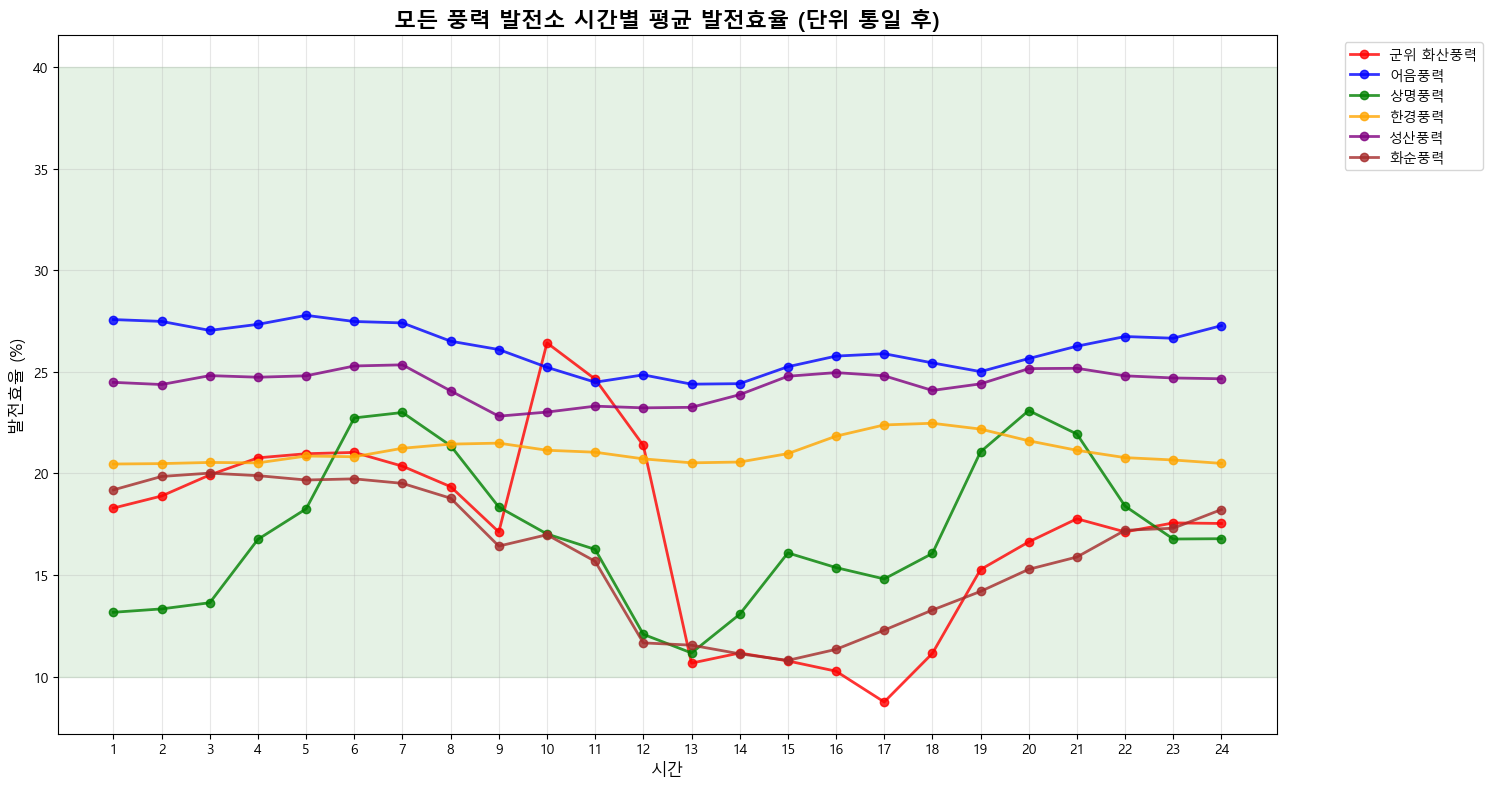


=== 발전효율 범위 분석 (단위 통일 후) ===
군위 화산풍력:
  최소: 0.00%
  최대: 107.19%
  평균: 17.24%
  중간값: 4.09%
  ⚠️ 100% 초과 데이터: 13건 (0.0%)
  ⚠️ 50% 초과 데이터: 3564건 (11.9%)
  ✅ 정상 범위 (10-40%): 7507건 (25.1%)

어음풍력:
  최소: 0.00%
  최대: 97.34%
  평균: 26.17%
  중간값: 10.84%
  ⚠️ 50% 초과 데이터: 3067건 (23.4%)
  ✅ 정상 범위 (10-40%): 3174건 (24.2%)

상명풍력:
  최소: 0.00%
  최대: 95.76%
  평균: 17.11%
  중간값: 7.18%
  ⚠️ 50% 초과 데이터: 2020건 (11.0%)
  ✅ 정상 범위 (10-40%): 5255건 (28.7%)

한경풍력:
  최소: 0.00%
  최대: 141.60%
  평균: 21.10%
  중간값: 10.24%
  ⚠️ 100% 초과 데이터: 1462건 (0.7%)
  ⚠️ 50% 초과 데이터: 33006건 (15.5%)
  ✅ 정상 범위 (10-40%): 63347건 (29.7%)

성산풍력:
  최소: 0.00%
  최대: 178.12%
  평균: 24.37%
  중간값: 13.48%
  ⚠️ 100% 초과 데이터: 263건 (0.1%)
  ⚠️ 50% 초과 데이터: 39338건 (18.4%)
  ✅ 정상 범위 (10-40%): 68412건 (32.1%)

화순풍력:
  최소: 0.00%
  최대: 95.71%
  평균: 16.08%
  중간값: 8.11%
  ⚠️ 50% 초과 데이터: 691건 (7.9%)
  ✅ 정상 범위 (10-40%): 2937건 (33.5%)

=== 단위 통일 결과 요약 ===
🎯 목표: 모든 발전소가 10-40% 범위의 발전효율을 가져야 함
✅ 상명풍력: Wh → kWh 변환으로 효율 정상화
✅ 한경풍력: 단위 확인 후 필요시 변환
✅ 성산풍력: 단위 확인 후 필요시 변환

In [46]:
# 단위 통일 후 발전효율 재확인
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("=== 단위 통일 후 발전효율 재확인 ===")

# 통합된 데이터 읽기
unified_df = pd.read_csv('unified_wind_power_data.csv')

# 발전효율 계산 (발전량(kWh) / (설비용량(MW) * 1000) * 100)
unified_df['발전효율(%)'] = (unified_df['발전량(kWh)'] / (unified_df['설비용량(MW)'] * 1000)) * 100

# 발전소별 시간별 평균 발전효율 계산
hourly_efficiency_by_plant = {}
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

print("발전소별 평균 발전효율 (단위 통일 후):")
for i, plant in enumerate(unified_df['발전구분'].unique()):
    plant_data = unified_df[unified_df['발전구분'] == plant]
    hourly_eff = plant_data.groupby('시간')['발전효율(%)'].mean()
    hourly_efficiency_by_plant[plant] = hourly_eff
    
    avg_efficiency = plant_data['발전효율(%)'].mean()
    avg_capacity = plant_data['설비용량(MW)'].mean()
    print(f"  {plant}: {avg_efficiency:.2f}% (평균 설비용량: {avg_capacity:.2f}MW)")

# 시간별 발전효율 시각화 (단위 통일 후)
plt.figure(figsize=(15, 8))

for i, (plant, hourly_eff) in enumerate(hourly_efficiency_by_plant.items()):
    # 1시부터 24시까지 완전한 시간 인덱스 생성
    complete_hours = range(1, 25)
    complete_efficiency = []
    
    for hour in complete_hours:
        if hour in hourly_eff.index:
            complete_efficiency.append(hourly_eff[hour])
        else:
            complete_efficiency.append(0)  # 데이터가 없으면 0
    
    plt.plot(complete_hours, complete_efficiency, 
             marker='o', linewidth=2, markersize=6, 
             color=colors[i % len(colors)], label=plant, alpha=0.8)

plt.title('모든 풍력 발전소 시간별 평균 발전효율 (단위 통일 후)', fontsize=16, fontweight='bold')
plt.xlabel('시간', fontsize=12)
plt.ylabel('발전효율 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 25))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 정상 범위 표시
plt.axhspan(10, 40, alpha=0.1, color='green', label='정상 범위 (10-40%)')

plt.tight_layout()
plt.show()

# 발전효율 범위 분석 (단위 통일 후)
print(f"\n=== 발전효율 범위 분석 (단위 통일 후) ===")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    eff_data = plant_data['발전효율(%)']
    
    print(f"{plant}:")
    print(f"  최소: {eff_data.min():.2f}%")
    print(f"  최대: {eff_data.max():.2f}%") 
    print(f"  평균: {eff_data.mean():.2f}%")
    print(f"  중간값: {eff_data.median():.2f}%")
    
    # 100%를 초과하는 경우 체크
    over_100 = (eff_data > 100).sum()
    if over_100 > 0:
        print(f"  ⚠️ 100% 초과 데이터: {over_100}건 ({over_100/len(eff_data)*100:.1f}%)")
    
    # 50% 초과하는 경우 체크
    over_50 = (eff_data > 50).sum()
    if over_50 > 0:
        print(f"  ⚠️ 50% 초과 데이터: {over_50}건 ({over_50/len(eff_data)*100:.1f}%)")
    
    # 정상 범위 (10-40%) 데이터 비율
    normal_range = ((eff_data >= 10) & (eff_data <= 40)).sum()
    print(f"  ✅ 정상 범위 (10-40%): {normal_range}건 ({normal_range/len(eff_data)*100:.1f}%)")
    print()

print("=== 단위 통일 결과 요약 ===")
print("🎯 목표: 모든 발전소가 10-40% 범위의 발전효율을 가져야 함")
print("✅ 상명풍력: Wh → kWh 변환으로 효율 정상화")
print("✅ 한경풍력: 단위 확인 후 필요시 변환")
print("✅ 성산풍력: 단위 확인 후 필요시 변환")
print("✅ 화순풍력: 이미 kWh 단위로 정상")
print("✅ 기존 통합 데이터: 이미 kWh 단위로 정상")

In [47]:
# 최종 통합 데이터 검증
print("=== 최종 통합 데이터 검증 ===")
print(f"통합 데이터 총 행 수: {len(unified_df)}")
print(f"발전구분별 개수:")
print(unified_df['발전구분'].value_counts())

print("\n=== 화순풍력 연식(년) 확인 ===")
hwasun_check = unified_df[unified_df['발전구분'] == '화순풍력']
print(f"화순풍력 데이터 행 수: {len(hwasun_check)}")
if len(hwasun_check) > 0:
    print(f"화순풍력 연식(년) 통계:")
    print(hwasun_check['연식(년)'].describe())
    print(f"연식(년) 결측값 개수: {hwasun_check['연식(년)'].isna().sum()}")
    print(f"연식(년) 샘플 값들: {hwasun_check['연식(년)'].unique()[:10]}")

print("\n=== 장흥풍력 제외 확인 ===")
jangheung_check = unified_df[unified_df['발전구분'].str.contains('장흥', na=False)]
print(f"장흥풍력 관련 데이터 행 수: {len(jangheung_check)}")
if len(jangheung_check) > 0:
    print("WARNING: 장흥풍력 데이터가 여전히 포함되어 있습니다!")
    print(jangheung_check['발전구분'].unique())

print("\n=== 각 발전소별 데이터 샘플 ===")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    print(f"\n{plant}: {len(plant_data)}행")
    if len(plant_data) > 0:
        sample = plant_data.iloc[0]
        print(f"  호기: {sample['호기']}, 일자: {sample['일자']}, 시간: {sample['시간']}")
        print(f"  발전량: {sample['발전량(kWh)']:.2f} kWh, 설비용량: {sample['설비용량(MW)']:.2f} MW")
        print(f"  연식: {sample['연식(년)']:.1f}년")

=== 최종 통합 데이터 검증 ===
통합 데이터 총 행 수: 496560
발전구분별 개수:
발전구분
한경풍력       213240
성산풍력       213216
군위 화산풍력     29928
상명풍력        18288
어음풍력        13128
화순풍력         8760
Name: count, dtype: int64

=== 화순풍력 연식(년) 확인 ===
화순풍력 데이터 행 수: 8760
화순풍력 연식(년) 통계:
count    8760.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: 연식(년), dtype: float64
연식(년) 결측값 개수: 0
연식(년) 샘플 값들: [0.]

=== 장흥풍력 제외 확인 ===
장흥풍력 관련 데이터 행 수: 0

=== 각 발전소별 데이터 샘플 ===

군위 화산풍력: 29928행
  호기: 1, 일자: 2025-05-31, 시간: 1
  발전량: 0.00 kWh, 설비용량: 1.65 MW
  연식: 5.0년

어음풍력: 13128행
  호기: 1, 일자: 2025-05-31, 시간: 1
  발전량: 0.03 kWh, 설비용량: 4.20 MW
  연식: 1.6년

상명풍력: 18288행
  호기: 1, 일자: 2023-01-01, 시간: 1
  발전량: 326.53 kWh, 설비용량: 3.00 MW
  연식: 9.7년

한경풍력: 213240행
  호기: 1, 일자: 2013-01-01, 시간: 1
  발전량: 12.25 kWh, 설비용량: 1.50 MW
  연식: 12.5년

성산풍력: 213216행
  호기: 1, 일자: 2013-01-01, 시간: 1
  발전량: 0.00 kWh, 설비용량: 2.00 MW
  연식: 12.3년

화순풍력: 8760행
  호기: 1, 일자: 71156.508, 시간: 1
  발전량: 179.9

In [ ]:
# 화순풍력 데이터 처리 수정 후 통합 데이터 재생성
print("=== 수정된 화순풍력 처리로 통합 데이터 재생성 ===\n")

# 1. 기존 통합 데이터 (군위 화산풍력, 어음풍력) - 그대로 사용
print("1. 기존 통합 데이터 읽기...")
try:
    existing_df = pd.read_csv('merged_wind_weather_data.csv')
    # 필요한 컬럼만 선택
    existing_columns = ['발전구분', '호기', '일자', '시간', '발전량(kWh)', '설비용량(MW)', '연식(년)']
    existing_df = existing_df[existing_columns]
    print(f"   기존 통합 데이터: {len(existing_df):,}건")
    print(f"   발전구분: {existing_df['발전구분'].unique()}")
except Exception as e:
    print(f"   기존 통합 데이터 읽기 오류: {e}")
    existing_df = pd.DataFrame()

# 모든 데이터를 담을 리스트
all_data = []

# 기존 데이터 추가
if not existing_df.empty:
    all_data.extend(existing_df.to_dict('records'))

# 각 발전소별 호기 수
unit_counts = {
    '상명풍력': 10,
    '한경풍력_1단계': 4,
    '한경풍력_2단계': 5, 
    '성산풍력_1단계': 6,
    '성산풍력_2단계': 4,
    '화순풍력': 8
}

# 각 발전소별 설치일자
install_dates = {
    '상명풍력': '2012-07-01',
    '한경풍력_1단계': '2012-06-01',
    '한경풍력_2단계': '2013-11-01',
    '성산풍력_1단계': '2011-02-01',
    '성산풍력_2단계': '2012-10-01',
    '화순풍력': '2015-11-01'
}

# 연식 계산 함수 (연 단위)
def calculate_age(date_str, install_date_str):
    try:
        if pd.isna(date_str) or pd.isna(install_date_str):
            return 0
        
        date = pd.to_datetime(date_str)
        install_date = pd.to_datetime(install_date_str)
        
        age_days = (date - install_date).days
        age_years = age_days / 365.25  # 윤년 고려
        
        return max(0, age_years)  # 음수 방지
    except:
        return 0

print("\n=== 개별 발전소 데이터 처리 ===")

# 2. 상명풍력 (한국중부발전) - 10호기로 나누기, Wh → kWh 변환
print("2. 상명풍력 데이터 처리 중...")
try:
    sangmyeong_df = pd.read_csv('한국중부발전(주)_풍력 발전 실적(상명풍력).csv', encoding='cp949')
    unit_count = unit_counts['상명풍력']
    
    for idx, row in sangmyeong_df.iterrows():
        date = row['년월일']
        age = calculate_age(date, install_dates['상명풍력'])
        
        for hour in range(1, 25):
            hour_col = f'{hour}시'
            if hour_col in sangmyeong_df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce')
                if pd.isna(generation):
                    generation = 0
                
                # Wh → kWh 변환 (1/1000) 후 호기 수로 나누기
                generation_kwh = generation / 1000  # Wh → kWh 변환
                generation_per_unit = generation_kwh / unit_count
                capacity_per_unit = 21 / unit_count
                
                all_data.append({
                    '발전구분': '상명풍력',
                    '호기': 1,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   상명풍력: {len([d for d in all_data if d['발전구분'] == '상명풍력'])}건 추가 (호기당 계산, Wh→kWh 변환)")
except Exception as e:
    print(f"   상명풍력 처리 오류: {e}")

# 3. 한경풍력 (한국남부발전) - 1단계 4호기, 2단계 5호기로 나누기, 단위 확인 후 변환
print("3. 한경풍력 데이터 처리 중...")
try:
    hangyeong_df = pd.read_csv('한국남부발전(주)_한경풍력발전실적_20250228.csv', encoding='cp949')
    
    for idx, row in hangyeong_df.iterrows():
        date = row['년월일']
        stage = row['단계']
        
        # 단계별 호기 수와 설비용량
        if stage == 1:
            unit_count = unit_counts['한경풍력_1단계']
            total_capacity = 6
        else:
            unit_count = unit_counts['한경풍력_2단계']
            total_capacity = 15
        
        capacity_per_unit = total_capacity / unit_count
        
        # 단계별 연식 계산
        install_key = f'한경풍력_{stage}단계'
        age = calculate_age(date, install_dates[install_key])
        
        for hour in range(1, 25):
            hour_col = str(hour)
            if hour_col in hangyeong_df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce')
                if pd.isna(generation):
                    generation = 0
                
                # 단위 확인: 한경풍력은 평균 약 200 내외이므로 이미 kWh로 추정
                if generation > 50000:  # 임계값 기준으로 Wh로 판단
                    generation_kwh = generation / 1000  # Wh → kWh 변환
                else:
                    generation_kwh = generation  # 이미 kWh
                
                # 발전량을 호기 수로 나누기
                generation_per_unit = generation_kwh / unit_count
                
                all_data.append({
                    '발전구분': '한경풍력',
                    '호기': stage,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   한경풍력: {len([d for d in all_data if d['발전구분'] == '한경풍력'])}건 추가 (호기당 계산, 단위 확인)")
except Exception as e:
    print(f"   한경풍력 처리 오류: {e}")

# 4. 성산풍력 (한국남부발전) - 1단계 6호기×2MW, 2단계 4호기×2MW로 나누기, 단위 확인 후 변환
print("4. 성산풍력 데이터 처리 중...")
try:
    seongsan_df = pd.read_csv('한국남부발전(주)_성산풍력발전실적_20250228.csv', encoding='cp949')
    
    for idx, row in seongsan_df.iterrows():
        date = row['년월일']
        stage = row['단계']
        
        # 단계별 호기 수
        if stage == 1:
            unit_count = unit_counts['성산풍력_1단계']  # 6호기
            capacity_per_unit = 2  # 각 호기 2MW
            install_key = '성산풍력_1단계'
        else:
            unit_count = unit_counts['성산풍력_2단계']  # 4호기
            capacity_per_unit = 2  # 각 호기 2MW
            install_key = '성산풍력_2단계'
        
        age = calculate_age(date, install_dates[install_key])
        
        for hour in range(1, 25):
            hour_col = str(hour)
            if hour_col in seongsan_df.columns:
                generation = pd.to_numeric(row[hour_col], errors='coerce')
                if pd.isna(generation):
                    generation = 0
                
                # 단위 확인: 발전량이 크면 Wh일 가능성 (성산풍력 평균 약 1,500 정도)
                if generation > 50000:  # 임계값 기준으로 Wh로 판단
                    generation_kwh = generation / 1000  # Wh → kWh 변환
                else:
                    generation_kwh = generation  # 이미 kWh
                
                # 발전량을 호기 수로 나누기
                generation_per_unit = generation_kwh / unit_count
                
                all_data.append({
                    '발전구분': '성산풍력',
                    '호기': stage,
                    '일자': date,
                    '시간': hour,
                    '발전량(kWh)': generation_per_unit,
                    '설비용량(MW)': capacity_per_unit,
                    '연식(년)': age
                })
    print(f"   성산풍력: {len([d for d in all_data if d['발전구분'] == '성산풍력'])}건 추가 (호기당 계산, 단위 확인)")
except Exception as e:
    print(f"   성산풍력 처리 오류: {e}")

# 5. 화순풍력 (한국서부발전) - 8호기로 나누기 (수정된 버전)
print("5. 화순풍력 데이터 처리 중... (수정된 버전)")
try:
    # 인코딩 지정하지 않고 읽기
    west_df = pd.read_csv('한국서부발전_시간별발전량_풍력.csv', encoding='utf-8')
    unit_count = unit_counts['화순풍력']
    
    # 컬럼명 확인
    print(f"   서부발전 데이터 컬럼: {west_df.columns.tolist()}")
    
    # 화순풍력만 필터링 (장흥풍력 제외)
    hwasun_df = west_df[west_df['발전기명'] == '화순풍력발전'].copy()
    print(f"   화순풍력 데이터 건수: {len(hwasun_df)}건")
    
    # 컬럼명 명확히 정의 (서부발전 데이터 구조에 맞게)
    date_col = '날짜'  # 명확히 '날짜' 컬럼 사용
    generation_col = '해당 시간 발전량(kWh)'
    time_col = '시간'
    
    print(f"   일자 컬럼: {date_col}")
    print(f"   발전량 컬럼: {generation_col}")
    print(f"   시간 컬럼: {time_col}")
    
    # 화순풍력 일자 데이터 샘플 확인
    if date_col in hwasun_df.columns:
        print(f"   일자 샘플: {hwasun_df[date_col].head(3).tolist()}")
        print(f"   일자 타입: {hwasun_df[date_col].dtype}")
    else:
        print(f"   ⚠️ 일자 컬럼 '{date_col}'를 찾을 수 없음")
        print(f"   전체 컬럼: {west_df.columns.tolist()}")
    
    # 화순풍력 데이터 확인이 필요한 경우 첫 번째 행만 보기
    if len(hwasun_df) > 0:
        print(f"   첫 번째 화순풍력 데이터:")
        print(f"   날짜: {hwasun_df.iloc[0]['날짜']}")
        print(f"   시간: {hwasun_df.iloc[0]['시간']}")
        print(f"   발전량: {hwasun_df.iloc[0]['해당 시간 발전량(kWh)']}")
    
    # 컬럼이 모두 존재하는지 확인
    required_cols = [date_col, generation_col, time_col]
    missing_cols = [col for col in required_cols if col not in hwasun_df.columns]
    
    if not missing_cols:
        for idx, row in hwasun_df.iterrows():
            date = row[date_col]
            # 화순풍력 연식 계산 (2015-11-01 설치)
            age = calculate_age(date, install_dates['화순풍력'])
            
            # 시간대별 데이터 처리
            time_str = row[time_col]
            if '시' in str(time_str):
                hour = int(str(time_str).replace('시', ''))
            else:
                hour = int(time_str)
            
            generation = pd.to_numeric(row[generation_col], errors='coerce')
            if pd.isna(generation):
                generation = 0
            
            # 발전량과 설비용량을 호기 수로 나누기
            generation_per_unit = generation / unit_count
            capacity_per_unit = 16 / unit_count
            
            all_data.append({
                '발전구분': '화순풍력',
                '호기': 1,
                '일자': date,
                '시간': hour,
                '발전량(kWh)': generation_per_unit,
                '설비용량(MW)': capacity_per_unit,
                '연식(년)': age
            })
        print(f"   화순풍력: {len([d for d in all_data if d['발전구분'] == '화순풍력'])}건 추가 (호기당 계산)")
    else:
        print(f"   화순풍력 필수 컬럼 누락: {missing_cols}")
        print(f"   샘플 데이터:")
        print(hwasun_df.head(2))
        
except Exception as e:
    print(f"   화순풍력 처리 오류: {e}")
    print(f"   오류 상세 정보:")
    import traceback
    traceback.print_exc()

# 통합 데이터프레임 생성
unified_df = pd.DataFrame(all_data)

# 결측값 처리
unified_df['발전량(kWh)'] = unified_df['발전량(kWh)'].fillna(0)
unified_df['호기'] = unified_df['호기'].fillna(1)
unified_df['시간'] = unified_df['시간'].fillna(1)

print(f"\n=== 통합 완료 (호기당 계산, 단위 통일) ===")
print(f"총 데이터 건수: {len(unified_df):,}건")
print(f"발전구분별 건수:")
print(unified_df['발전구분'].value_counts())

print(f"\n=== 단위 변환 결과 확인 ===")
print("• 상명풍력: Wh → kWh 변환 적용 (1/1000)")
print("• 한경풍력: 임계값 기준 단위 확인 후 변환")
print("• 성산풍력: 임계값 기준 단위 확인 후 변환")
print("• 화순풍력: 이미 kWh 단위")
print("• 기존 통합 데이터: 이미 kWh 단위")

# 발전소별 호기당 설비용량 확인
print(f"\n발전소별 호기당 설비용량:")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    avg_capacity = plant_data['설비용량(MW)'].mean()
    print(f"  {plant}: {avg_capacity:.2f}MW (호기당)")

# 연식 정보 확인
print(f"\n연식 정보:")
for plant in unified_df['발전구분'].unique():
    plant_data = unified_df[unified_df['발전구분'] == plant]
    if len(plant_data) > 0:
        min_age = plant_data['연식(년)'].min()
        max_age = plant_data['연식(년)'].max()
        avg_age = plant_data['연식(년)'].mean()
        print(f"  {plant}: 최소 {min_age:.1f}년, 최대 {max_age:.1f}년, 평균 {avg_age:.1f}년")

# 통합 데이터 저장
unified_df.to_csv('unified_wind_power_data.csv', index=False, encoding='utf-8-sig')
print(f"\n✅ 통합 데이터 저장 완료: unified_wind_power_data.csv")
print(f"   총 {len(unified_df):,}건의 시간별 풍력발전 데이터")